100%|█████████████████████████████████████████████████████████████████████████████| 28.4M/28.4M [00:12<00:00, 2.44MB/s]

Extracting files...



Processing directory: C:\Users\16073\.cache\kagglehub\datasets\mbkinaci\fruit-images-for-object-detection\versions\1\test_zip

Processing directory: C:\Users\16073\.cache\kagglehub\datasets\mbkinaci\fruit-images-for-object-detection\versions\1\test_zip\test
Processed apple_77.jpg - Class: apple, BBox: [71.0, 60.0, 175.0, 164.0]
Processed apple_77.jpg - Class: apple, BBox: [12.0, 22.0, 105.0, 111.0]
Processed apple_77.jpg - Class: apple, BBox: [134.0, 23.0, 243.0, 115.0]
Processed apple_77.jpg - Class: apple, BBox: [107.0, 126.0, 216.0, 229.0]
Processed apple_77.jpg - Class: apple, BBox: [207.0, 138.0, 298.0, 229.0]
Processed apple_78.jpg - Class: apple, BBox: [10.0, 8.0, 344.0, 336.0]
Processed apple_79.jpg - Class: apple, BBox: [77.0, 183.0, 641.0, 716.0]
Processed apple_80.jpg - Class: apple, BBox: [155.0, 105.0, 453.0, 436.0]
Processed apple_81.jpg - Class: apple, BBox: [70.0, 398.0, 1388.0, 1731.0]
Processed apple_82.jpg - Class: apple, BBox: [65.0, 122.0, 365.0, 404.0]
Processed 

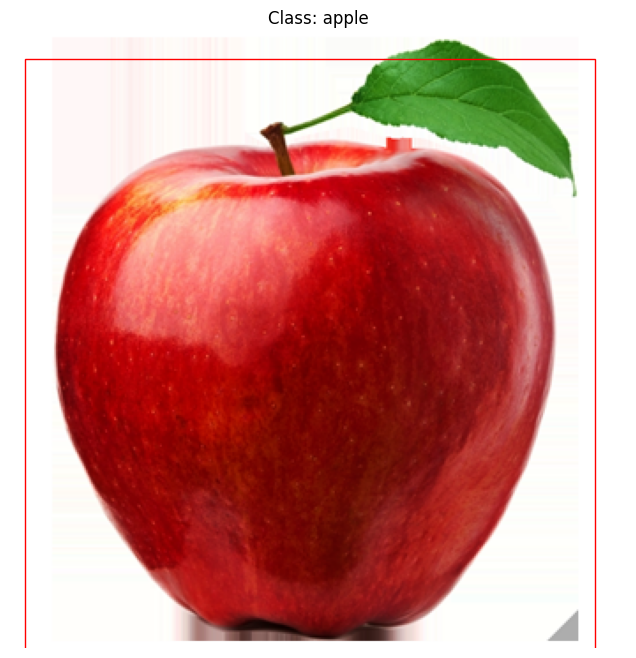

In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
from PIL import Image
import xml.etree.ElementTree as ET  # For parsing XML files

# Define standard size for all images
TARGET_SIZE = (349, 349)

# Input data files are available in the read-only "../input/" directory
base_path = kagglehub.dataset_download('mbkinaci/fruit-images-for-object-detection', force_download=True)

# Initialize lists to store images, annotations and labels
train_images = []
train_annotations = []  # Will store bounding box coordinates
train_labels = []      # Will store class names
test_images = []
test_annotations = []
test_labels = []

def load_and_standardize_image(img_path):
    """Load and standardize image to RGB format with target size"""
    img = Image.open(img_path)
    img = img.convert('RGB')
    img = img.resize(TARGET_SIZE, Image.Resampling.LANCZOS)
    return np.array(img)

def parse_annotation(xml_path):
    """Parse XML annotation file to get object names and bounding boxes"""
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    objects = root.findall('object')
    annotations = []
    
    for obj in objects:
        name = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = float(bbox.find('xmin').text)
        ymin = float(bbox.find('ymin').text)
        xmax = float(bbox.find('xmax').text)
        ymax = float(bbox.find('ymax').text)
        
        annotations.append((name, [xmin, ymin, xmax, ymax]))
    
    return annotations

# Find and process the train and test directories directly
for root, dirs, files in os.walk(base_path):
    if 'test' in root or 'train' in root:
        print(f"\nProcessing directory: {root}")
        for img_file in files:
            if img_file.endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(root, img_file)
                xml_path = os.path.join(root, img_file.rsplit('.', 1)[0] + '.xml')
                
                if os.path.exists(xml_path):
                    try:
                        # Load and process image
                        img = load_and_standardize_image(img_path)
                        
                        # Parse annotation
                        annotations = parse_annotation(xml_path)
                        
                        for label, bbox in annotations:
                            if 'test' in root:
                                test_images.append(img)
                                test_annotations.append(bbox)
                                test_labels.append(label)
                            else:
                                train_images.append(img)
                                train_annotations.append(bbox)
                                train_labels.append(label)
                                
                            print(f"Processed {img_file} - Class: {label}, BBox: {bbox}")
                            
                    except Exception as e:
                        print(f"Error processing {img_path}: {e}")

# Convert to numpy arrays
train_images = np.array(train_images)
test_images = np.array(test_images)
train_annotations = np.array(train_annotations)
test_annotations = np.array(test_annotations)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

print("\nFinal dataset statistics:")
print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Number of annotations: {len(train_annotations)} training, {len(test_annotations)} test")
print("\nUnique classes:", np.unique(train_labels))

# Display a sample image with its annotation
if len(train_images) > 0:
    idx = 0  # Show first image
    plt.figure(figsize=(8, 8))
    plt.imshow(train_images[idx])
    
    # Draw bounding box
    bbox = train_annotations[idx]
    rect = plt.Rectangle((bbox[0], bbox[1]), 
                        bbox[2] - bbox[0], 
                        bbox[3] - bbox[1], 
                        fill=False, 
                        color='red')
    plt.gca().add_patch(rect)
    
    plt.title(f"Class: {train_labels[idx]}")
    plt.axis('off')
    plt.show()

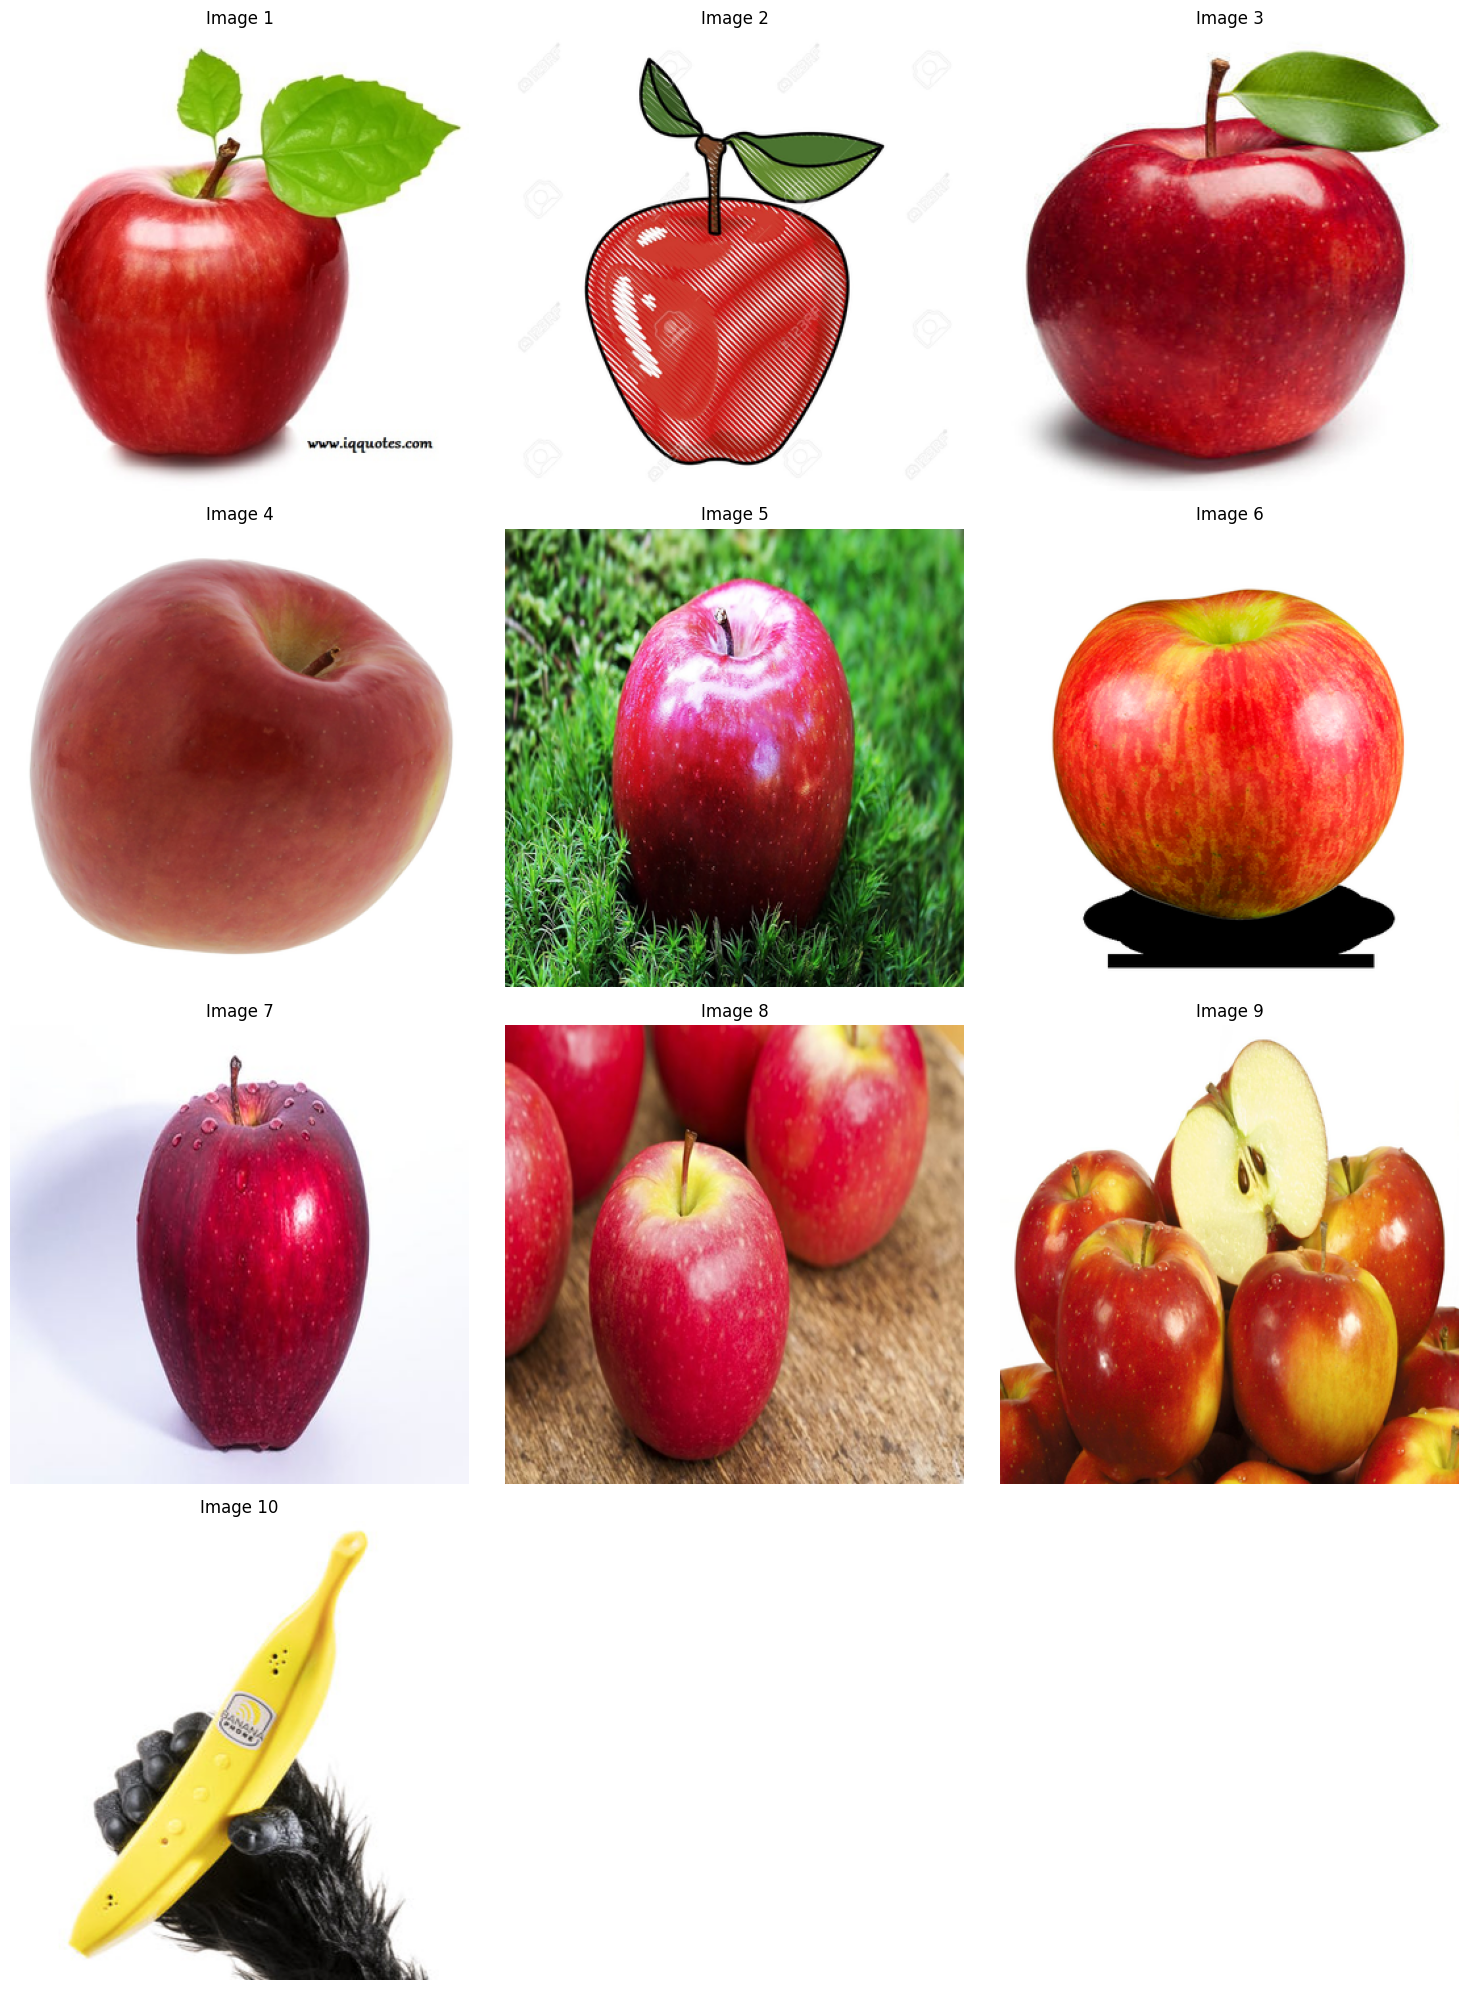

In [44]:
def show_images(images):
    """Display multiple images using matplotlib."""
    num_images = len(images)
    cols = 3  # Number of columns for the grid
    rows = (num_images // cols) + (num_images % cols > 0)  # Calculate rows needed
    plt.figure(figsize=(15, 5 * rows))
    
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image)
        plt.axis('off')  # Hide axes
        plt.title(f"Image {i + 1}")
    
    plt.tight_layout()
    plt.show()

# Display a single image or multiple images
show_images(train_images[10:20])  # Change the slice to display more images
show_images(test_images[10:20])



In [47]:
class_counts = np.unique(train_labels, return_counts=True)
for class_name, count in zip(class_counts[0], class_counts[1]):
    print(f"Class: {class_name}, Count: {count}")


Class: apple, Count: 156
Class: banana, Count: 169
Class: orange, Count: 140
